In [104]:
from tensorflow import keras
import numpy as np
from tensorflow.keras.datasets import fashion_mnist
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout
from tensorflow.keras.callbacks import EarlyStopping, ReduceLROnPlateau
from tensorflow.keras.utils import to_categorical
from sklearn.metrics import classification_report

In [93]:
(X_train, y_train), (X_test, y_test) = fashion_mnist.load_data()

In [94]:
X_train = X_train.reshape((60000, 28, 28, 1)).astype('float32') / 255
X_test = X_test.reshape((10000, 28, 28, 1)).astype('float32') / 255


y_train = to_categorical(y_train)
y_test = to_categorical(y_test)


In [95]:
model = Sequential()
model.add(Conv2D(32, (3, 3), activation='relu', input_shape=(28, 28, 1)))
model.add(MaxPooling2D((2, 2)))
model.add(Conv2D(64, (3, 3), activation='relu'))
model.add(MaxPooling2D((2, 2)))
model.add(Conv2D(128, (3, 3), activation='relu'))
model.add(Flatten())
model.add(Dense(128, activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(64, activation='relu'))  
model.add(Dropout(0.3))  
model.add(Dense(10, activation='softmax'))

In [96]:
model.summary()

Model: "sequential_11"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_27 (Conv2D)          (None, 26, 26, 32)        320       
                                                                 
 max_pooling2d_18 (MaxPooli  (None, 13, 13, 32)        0         
 ng2D)                                                           
                                                                 
 conv2d_28 (Conv2D)          (None, 11, 11, 64)        18496     
                                                                 
 max_pooling2d_19 (MaxPooli  (None, 5, 5, 64)          0         
 ng2D)                                                           
                                                                 
 conv2d_29 (Conv2D)          (None, 3, 3, 128)         73856     
                                                                 
 flatten_9 (Flatten)         (None, 1152)            

In [97]:
early_stopping = EarlyStopping(monitor='val_loss', patience=5, restore_best_weights=True)
reduce_lr = ReduceLROnPlateau(monitor='val_loss', factor=0.2, patience=2, min_lr=1e-6)

In [98]:
model.compile(optimizer=keras.optimizers.legacy.Adam(learning_rate=0.001), 
              loss='categorical_crossentropy', 
              metrics=['accuracy'])

In [99]:
history = model.fit(X_train, y_train, epochs=20, batch_size=64, validation_split=0.2, callbacks=[early_stopping, reduce_lr])

Epoch 1/20
750/750 [==============================] - 15s 19ms/step - loss: 0.7834 - accuracy: 0.7075 - val_loss: 0.4783 - val_accuracy: 0.8192 - lr: 0.0010
Epoch 2/20
750/750 [==============================] - 19s 25ms/step - loss: 0.4870 - accuracy: 0.8237 - val_loss: 0.3645 - val_accuracy: 0.8652 - lr: 0.0010
Epoch 3/20
750/750 [==============================] - 18s 24ms/step - loss: 0.4002 - accuracy: 0.8593 - val_loss: 0.3199 - val_accuracy: 0.8815 - lr: 0.0010
Epoch 4/20
750/750 [==============================] - 16s 22ms/step - loss: 0.3539 - accuracy: 0.8770 - val_loss: 0.3010 - val_accuracy: 0.8875 - lr: 0.0010
Epoch 5/20
750/750 [==============================] - 16s 21ms/step - loss: 0.3167 - accuracy: 0.8881 - val_loss: 0.3070 - val_accuracy: 0.8891 - lr: 0.0010
Epoch 6/20
750/750 [==============================] - 16s 21ms/step - loss: 0.2941 - accuracy: 0.8968 - val_loss: 0.2873 - val_accuracy: 0.8970 - lr: 0.0010
Epoch 7/20
750/750 [==============================] - 16s 

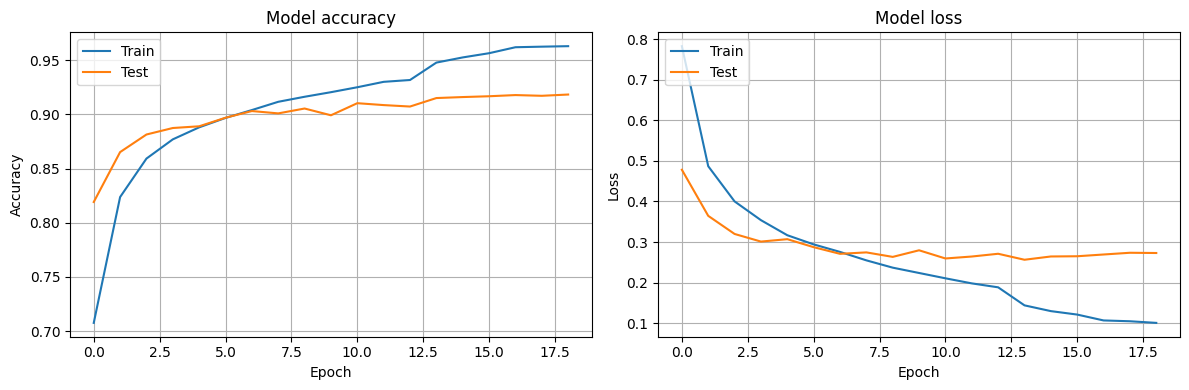

In [101]:
import matplotlib.pyplot as plt

# Plot training & validation accuracy values
plt.figure(figsize=(12, 4))

plt.subplot(1, 2, 1)
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Model accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Test'], loc='upper left')
plt.grid()

# Plot training & validation loss values
plt.subplot(1, 2, 2)
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Test'], loc='upper left')
plt.grid()

plt.tight_layout()
plt.show()

In [102]:
y_pred_classes = np.argmax(y_pred, axis=1)
y_test_labels = np.argmax(y_test, axis=1)

class_names = ['Top', 'Trousers', 'Pullover', 'Dress', 'Coat', 'Sandal', 'Shirt', 'Sneaker', 'Bag', 'Ankle boot']

In [103]:
report = classification_report(y_test_labels, y_pred_classes, target_names=class_names)
print(report)

              precision    recall  f1-score   support

         Top       0.85      0.88      0.87      1000
    Trousers       1.00      0.98      0.99      1000
    Pullover       0.86      0.85      0.86      1000
       Dress       0.89      0.93      0.91      1000
        Coat       0.87      0.81      0.84      1000
      Sandal       0.97      0.98      0.98      1000
       Shirt       0.71      0.72      0.71      1000
     Sneaker       0.97      0.95      0.96      1000
         Bag       0.98      0.98      0.98      1000
  Ankle boot       0.96      0.97      0.97      1000

    accuracy                           0.91     10000
   macro avg       0.91      0.91      0.91     10000
weighted avg       0.91      0.91      0.91     10000

